In [2]:
%cd ../fiberphotopy/

C:\Users\mceau\Documents\fiberphotopy\fiberphotopy


In [5]:
import importlib
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import pprint
import scipy
import time


import fp_utils
import behavioral_data
import fiber_data
import analysis

def rel():
    importlib.reload(behavioral_data)
    importlib.reload(fiber_data)
    importlib.reload(analysis)
    importlib.reload(fp_utils)
rel()

# Brouillons

In [4]:
%ls

 Le volume dans le lecteur C s’appelle System
 Le numéro de série du volume est A698-0041

 Répertoire de C:\Users\mceau\Documents\fiberphotopy\fiberphotopy

17/03/2022  13:21    <DIR>          .
17/03/2022  13:21    <DIR>          ..
16/03/2022  17:03    <DIR>          .ipynb_checkpoints
16/03/2022  15:08                 0 __init__.py
17/03/2022  13:21    <DIR>          __pycache__
16/03/2022  15:59             9 610 analysis.py
17/03/2022  13:21            21 944 behavioral_data.py
16/03/2022  15:59             8 830 fiber_data.py
16/03/2022  17:03             1 397 fp_utils.py
11/03/2022  10:49             6 929 info.py
               6 fichier(s)           48 710 octets
               4 Rép(s)  915 446 509 568 octets libres


In [6]:
b = behavioral_data.BehavioralData('../../DATA/Habituation1j1603202201rat25.dat')

In [771]:
p08.__dict__

{'hello': 'Hi',
 'configfile': 'config.yaml',
 'config': {'USER': {'GENERAL': {'rat_ID': 'Not specified',
    'file_unit': False,
    'user_unit': 's',
    'experiment_duration': {'min': 29, 'max': 28999}},
   'BEHAVIOR': {'fixed_ratio': 5,
    'close_interval': 5,
    'elements': {'HLED_OFF': [True, 'Drug Period', '#069AF3'],
     'HLED_ON': [True, 'No Drug Period', 'gold'],
     'TTL1_ON': [True, 'Fiber Photometry Recordings', 'g'],
     'np1': [True, 'Active Nosepokes', 'r'],
     'np2': [True, 'Inactive Nosepokes', 'b'],
     'inj1': [True, 'Injections', 'k'],
     'LED1_ON': [True, 'Conditioned Stimulus', 'goldenrod'],
     'LED1_OFF': [False, 'LED1_OFF', ['darkgray', 'darkgrey']],
     'LED2_OFF': [False, 'LED2_OFF', 'slategrey'],
     'LED2_ON': [True, ' Drug Light On', 'slategrey'],
     'DARK': [False, 'DARK', 'k'],
     'TO_DARK': [False, 'TO_DARK', 'olivedrab'],
     'NOTO_DARK': [False, 'NOTO_DARK', 'black'],
     'TIMEOUT': [True, 'Time outs', 'k'],
     'switch_d_nd': [Fa

# Analysis

In [66]:
rel()
b1 = behavioral_data.BehavioralData('../../DATA/35/bsa09032022c20_02.dat')


In [67]:
%ls

 Le volume dans le lecteur C s’appelle System
 Le numéro de série du volume est A698-0041

 Répertoire de C:\Users\mceau\Documents\fiberphotopy\fiberphotopy

21/03/2022  15:58    <DIR>          .
21/03/2022  15:58    <DIR>          ..
16/03/2022  17:03    <DIR>          .ipynb_checkpoints
16/03/2022  15:08                 0 __init__.py
21/03/2022  15:58    <DIR>          __pycache__
21/03/2022  15:58            11 992 analysis.py
21/03/2022  14:14            22 687 behavioral_data.py
21/03/2022  14:13               593 bsa09032022c20_02.csv
21/03/2022  15:02             8 896 fiber_data.py
16/03/2022  17:03             1 397 fp_utils.py
17/03/2022  14:11             6 965 info.py
               7 fichier(s)           52 530 octets
               4 Rép(s)  925 080 223 744 octets libres


In [68]:
rel()
test = analysis.MultiSession("../../DATA/test_data")

In [75]:
multi = test.analyze('switch_d_nd')

No fiber recording at this timestamp


In [76]:
multi.epoch

[array([-10.00014,  -9.99931,  -9.99849, ...,   9.99813,   9.99896,
          9.99978]),
 array([-10.00029,  -9.99946,  -9.99863, ...,   9.99848,   9.9993 ,
         10.00013]),
 array([-10.000343,  -9.999516,  -9.998688, ...,   9.998103,   9.99893 ,
          9.999757])]

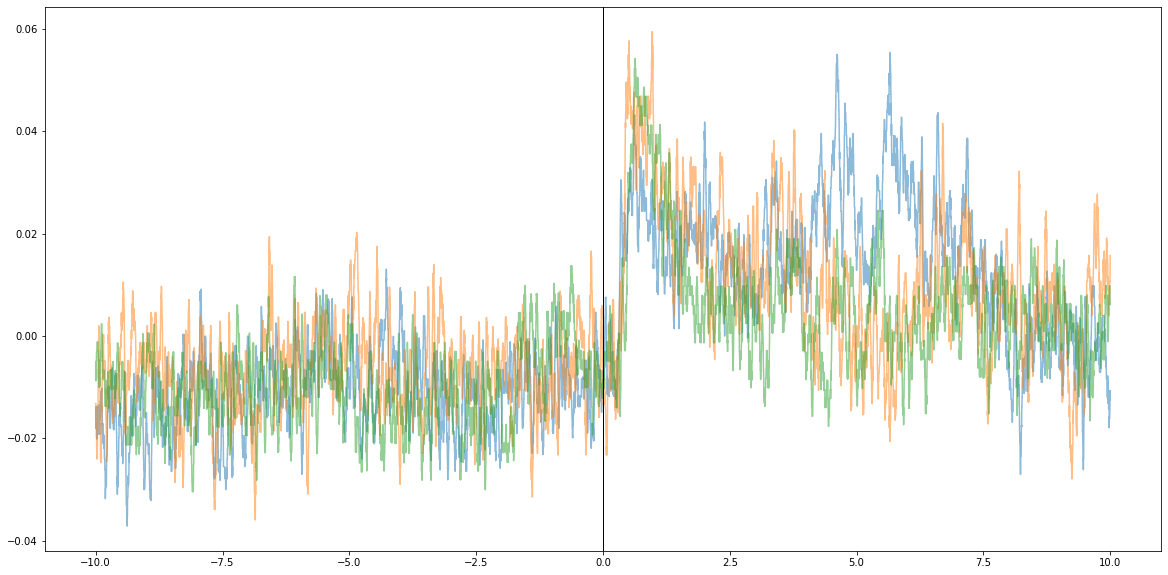

In [98]:
plt.figure(figsize=(20,10))
for n,z in enumerate(multi.signal):
    plt.plot(multi.epoch[n],z,alpha=0.5)
plt.axvline(0,alpha=1,linewidth=1,c='k')

In [78]:
multi.default_window

[10.0, 10.0]

In [105]:
bins = int((multi.default_window[0]+multi.default_window[1])*np.min(multi.sampling_rate))

In [110]:
data = multi.signal[0]

In [119]:
resample(data,n_samples=bins)

array([-0.02375624, -0.01017443, -0.01444383, ..., -0.00903859,
       -0.01411939, -0.01146777])

In [124]:
epoch = multi.epoch[0]

In [125]:
data

array([-0.01592503, -0.01425518, -0.01592503, ..., -0.01247589,
       -0.01065052, -0.01247589])

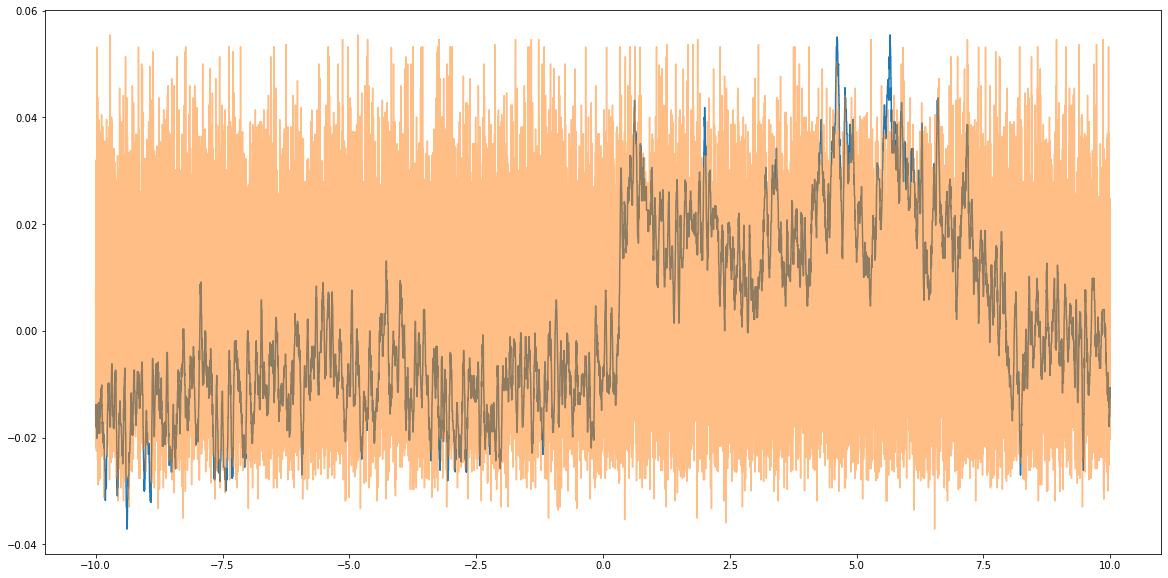

In [130]:
plt.figure(figsize=(20,10))
plt.plot(epoch,data)
plt.plot(epoch[:-1],resample(data,n_samples=bins),alpha=0.5)